In [2]:
!pip install networkx
!pip install pygame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 22.2 MB/s eta 0:00:00 0:00:01


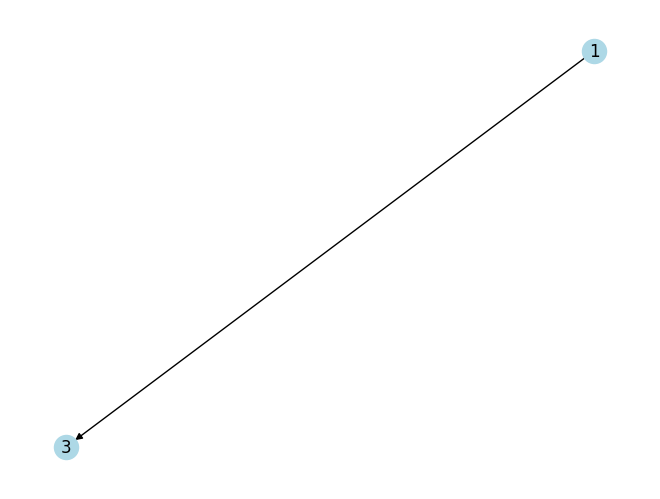

In [1]:
import tkinter as tk
from tkinter import simpledialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt

class UbiquitinGraphBuilder:
    def __init__(self, master):
        self.master = master
        self.master.title("Ubiquitin Chain Builder")
        self.G = nx.DiGraph()
        self.node_counter = 1

        # GUI Layout
        self.add_node_btn = tk.Button(master, text="Add Ubiquitin Node", command=self.add_node)
        self.add_node_btn.pack()

        self.add_edge_btn = tk.Button(master, text="Connect Nodes", command=self.add_edge)
        self.add_edge_btn.pack()

        self.draw_btn = tk.Button(master, text="Draw Graph", command=self.draw_graph)
        self.draw_btn.pack()

    def add_node(self):
        site = simpledialog.askstring("Input", "Lysine site (e.g., K48):")
        self.G.add_node(self.node_counter, site=site)
        self.node_counter += 1

    def add_edge(self):
        from_node = int(simpledialog.askstring("Input", "From Node ID:"))
        to_node = int(simpledialog.askstring("Input", "To Node ID:"))
        self.G.add_edge(from_node, to_node)

    def draw_graph(self):
        pos = nx.spring_layout(self.G)
        labels = nx.get_node_attributes(self.G, 'site')
        nx.draw(self.G, pos, with_labels=True, node_color='lightblue')
        nx.draw_networkx_labels(self.G, pos, labels)
        plt.show()

root = tk.Tk()
app = UbiquitinGraphBuilder(root)
root.mainloop()

In [3]:
import pygame
import math

# Pygame setup
pygame.init()
screen = pygame.display.set_mode((800, 600))
pygame.display.set_caption("Ubiquitin-like Graph Builder")
clock = pygame.time.Clock()

# Colors
WHITE = (255, 255, 255)
GRAY = (180, 180, 180)
BLACK = (0, 0, 0)

# Data structure
nodes = []  # List of (x, y)
edges = []  # List of (index1, index2)
radius = 20

running = True
last_node_idx = None

def draw():
    screen.fill(WHITE)

    # Draw edges
    for i1, i2 in edges:
        pygame.draw.line(screen, GRAY, nodes[i1], nodes[i2], 2)

    # Draw nodes
    for idx, (x, y) in enumerate(nodes):
        pygame.draw.circle(screen, GRAY, (x, y), radius)
        pygame.draw.circle(screen, BLACK, (x, y), radius, 2)
        font = pygame.font.SysFont(None, 24)
        img = font.render(str(idx), True, BLACK)
        screen.blit(img, (x - 10, y - 10))

    pygame.display.flip()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            x, y = pygame.mouse.get_pos()
            nodes.append((x, y))
            current_idx = len(nodes) - 1

            if last_node_idx is not None:
                edges.append((last_node_idx, current_idx))

            last_node_idx = current_idx

    draw()
    clock.tick(60)

pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
import pygame

# Pygame setup
pygame.init()
screen = pygame.display.set_mode((800, 600))
pygame.display.set_caption("Ubiquitin-like Graph Builder with Base Structure")
clock = pygame.time.Clock()

# Colors
WHITE = (255, 255, 255)
GRAY = (180, 180, 180)
BLACK = (0, 0, 0)

radius = 20

# Base structure: 5 complete levels
nodes = [
    # Level 0 (bottom root)
    (400, 500),  # 0

    # Level 1
    (350, 420),  # 1
    (450, 420),  # 2

    # Level 2
    (300, 340),  # 3
    (400, 340),  # 4
    (500, 340),  # 5

    # Level 3
    (250, 260),  # 6
    (350, 260),  # 7
    (450, 260),  # 8
    (550, 260),  # 9

    # Level 4 (top)
    (200, 180),  # 10
    (300, 180),  # 11
    (400, 180),  # 12
    (500, 180),  # 13
    (600, 180),  # 14

    # Level 5 (top-most)
    (150, 100),  # 15
    (250, 100),  # 16
    (350, 100),  # 17
    (450, 100),  # 18
    (550, 100),  # 15
    (650, 100)  # 16
]

edges = [
    # Level 0 to Level 1
    (0, 1), (0, 2),

    # Level 1 to Level 2
    (1, 3), (1, 4),
    (2, 4), (2, 5),

    # Level 2 to Level 3
    (3, 6), (3, 7),
    (4, 7), (4, 8),
    (5, 8), (5, 9),

    # Level 3 to Level 4
    (6, 10), (6, 11),
    (7, 11), (7, 12),
    (8, 12), (8, 13),
    (9, 13), (9, 14),

    # Level 4 to Level 5
    (10, 15), (10, 16),
    (11, 16), (11, 17),
    (12, 17), (12, 18),
]

# For new additions
last_node_idx = None

def draw():
    screen.fill(WHITE)

    # Draw edges
    for i1, i2 in edges:
        pygame.draw.line(screen, GRAY, nodes[i1], nodes[i2], 2)

    # Draw nodes
    for idx, (x, y) in enumerate(nodes):
        pygame.draw.circle(screen, GRAY, (x, y), radius)
        pygame.draw.circle(screen, BLACK, (x, y), radius, 2)
        font = pygame.font.SysFont(None, 24)
        img = font.render(str(idx), True, BLACK)
        screen.blit(img, (x - 10, y - 10))

    pygame.display.flip()

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            x, y = pygame.mouse.get_pos()
            nodes.append((x, y))
            current_idx = len(nodes) - 1

            if last_node_idx is not None:
                lx, ly = nodes[last_node_idx]
                x, y = lx, ly - 80  # Go upward
            else:
                x, y = pygame.mouse.get_pos()
                
            last_node_idx = current_idx

    draw()
    clock.tick(60)

pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
